# ⚡ Perceptron from Scratch (1957 Rosenblatt Style)
The **grand-daddy** of neural networks: one linear layer + one step = yes/no decision.

## 🔍 What Does a Perceptron Do?
- Looks at numbers → computes a **weighted sum** → applies a **step**.  
- Output = **1** if sum ≥ 0, else **0**.  
- Learns by **tweaking weights** whenever it makes a mistake (no calculus, just addition!).

## 🧮 Math in 3 Lines
**Weighted sum:**  
z = w·x + b

**Step (activation):**  
ŷ = 1 if z ≥ 0, else 0

**Update rule (when wrong):**  
w ← w + α (y – ŷ) x  
b ← b + α (y – ŷ)  
(α = learning rate)

In [1]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        y_ = np.array([1 if label > 0 else 0 for label in y])

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = self._unit_step_func(linear_output)

                update = self.lr * (y_[idx] - y_pred)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self._unit_step_func(linear_output)

## 🧪 Toy Data – Two Blobs
`make_blobs` gives two nicely separable clouds → perfect for our linear rule.

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

X, y = datasets.make_blobs(n_samples=150, n_features=2,
                           centers=2, cluster_std=1.05,
                           random_state=2)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123)

## 🎯 Train & Evaluate
Zero calculus—just loops and additions.

In [3]:
p = Perceptron(learning_rate=0.01, n_iters=1000)
p.fit(X_train, y_train)
y_pred = p.predict(X_test)

acc = (y_test == y_pred).mean()
print(f"Perceptron accuracy: {acc:.2%}")

Perceptron accuracy: 100.00%


## 🎨 Plot Decision Boundary
A straight line `w·x + b = 0` cuts the plane in half.

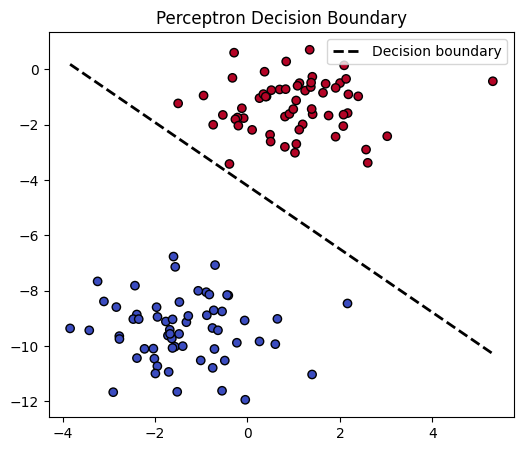

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="coolwarm", edgecolors="k")

# decision line: w0 x0 + w1 x1 + b = 0  →  x1 = -(w0 x0 + b)/w1
x0_min, x0_max = X_train[:, 0].min(), X_train[:, 0].max()
x1_decision = -(p.weights[0] * np.array([x0_min, x0_max]) + p.bias) / p.weights[1]
plt.plot([x0_min, x0_max], x1_decision, "k--", lw=2, label="Decision boundary")
plt.legend()
plt.title("Perceptron Decision Boundary")
plt.show()

## ✅ Take-Home in One Tweet
Weighted sum → step → fix mistakes → repeat.  
If data is linearly separable, Perceptron **guaranteed** to find a perfect line!